# 로지스틱 회귀
## 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine-date')

In [2]:
wine.head()     # alcohol, sugar, pH 특성을 가지고 레드와인 or 화이트와인 판별

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [7]:
# 훈련셋:80, 테스트:20%
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
data, target, test_size = 0.2, random_state = 42)

In [9]:
print(6497*0.8, 6497*0.2)
print(train_input.shape, test_input.shape)

5197.6 1299.4
(5197, 3) (1300, 3)


In [11]:
from sklearn.preprocessing import StandardScaler    #스케일링
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

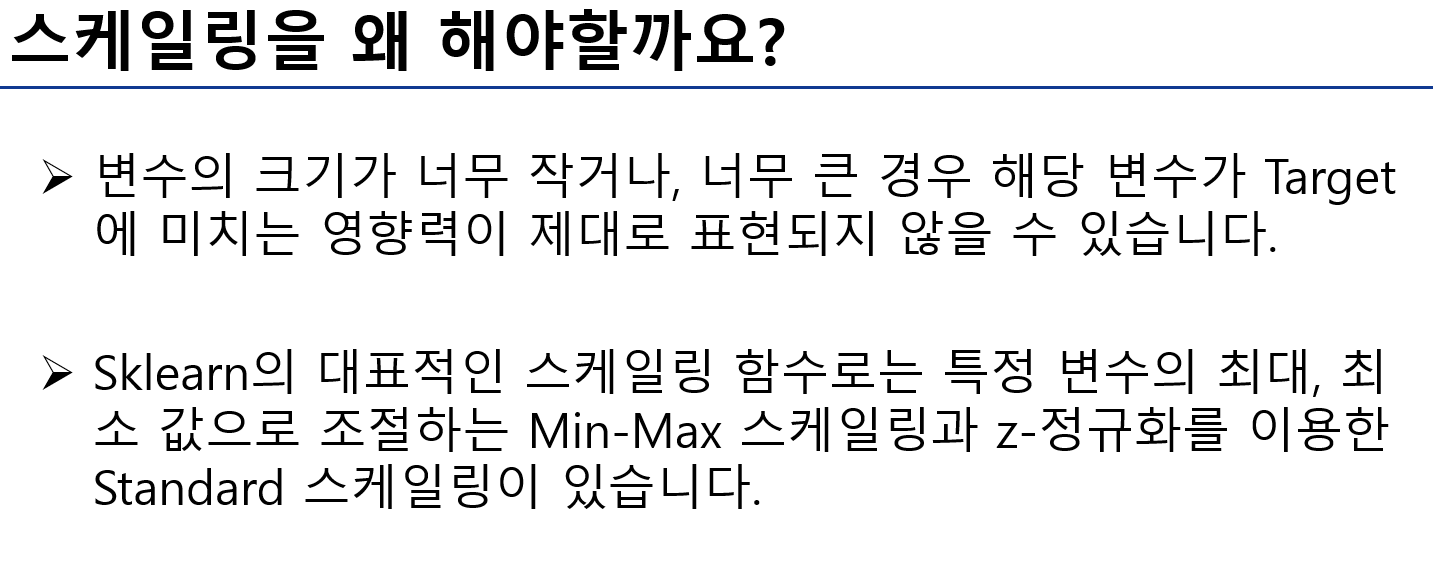

In [12]:
from sklearn.linear_model import LogisticRegression     # 모델 훈련, 평가
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [13]:
# alcohol*(0.51270274), sugar*(1.6733911), pH*(-0.68767781)
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 결정트리

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


In [20]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

** 의사결정트리의 장점**<br>
다른 모델들에 비해, 큰 수학적인 지식이 없어도, 트리 그림을 보면, 어떻게 예측값이 도출되었는지 쉽게 알 수 있다.<br>
**tree의 node**는 질문이나 정답을 담은 네모 상자를 말하며<br>
**root node**는 최상위 node이고
**leaf node**는 마지막 node입니다.

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


* 모든 리프 노드가 순수 노드이므로 훈련 세트의 정확도는 100% 이다
* 즉, 트리가 훈련 데이터의 모든 레이블을 완변하게 기억한다. 
* 결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해진다. 
* 가지치기 하지 않는 트리는 과대적합되기 쉽고 일반화가 어렵다. 

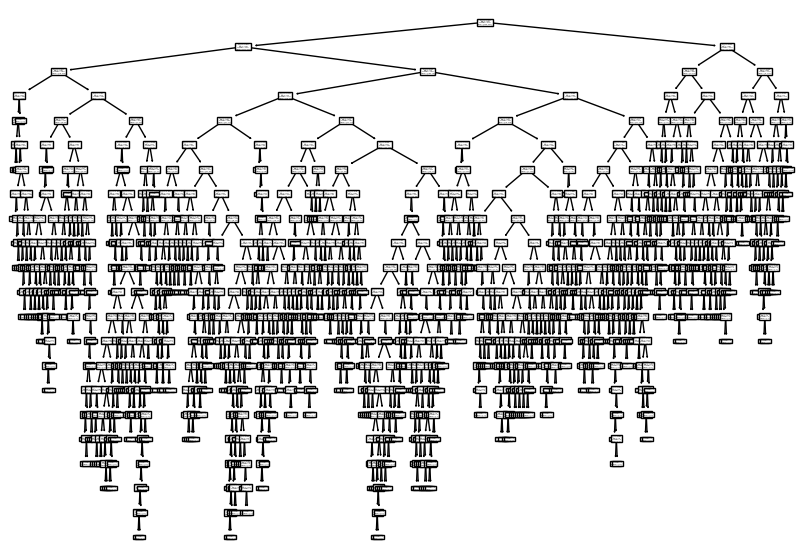

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10, 7))
plot_tree(dt)
plt.show()

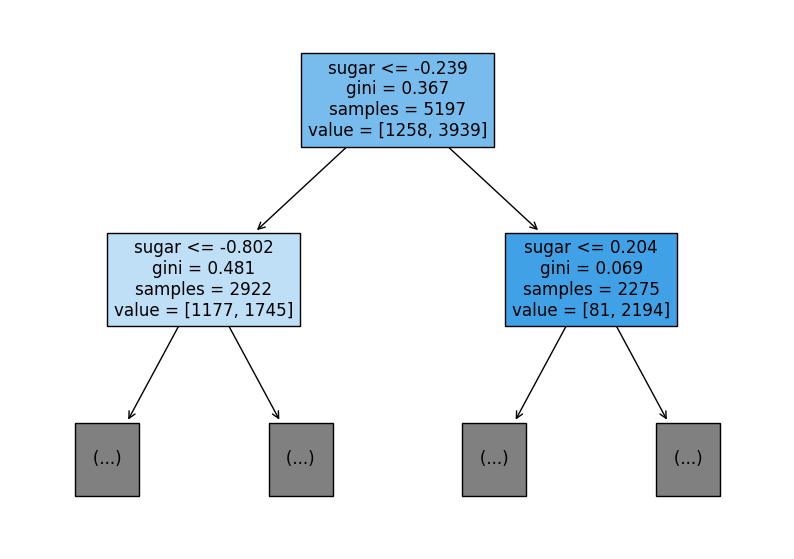

In [25]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

### 가지치기
* max_depth: 트리의 최대 한도 깊이

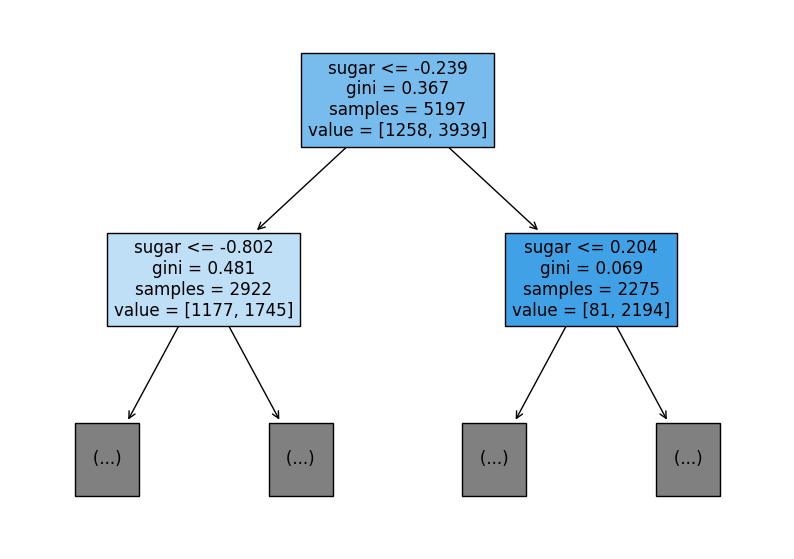

In [27]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 1, filled=True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

### 가지치기
* max_depth: 트리의 최대 한도 깊이

In [29]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


* 훈련 세트의 정확도는 떨어지지마 테스트 세트의 성능은 개선되었다. 
* 이렇게 depth를 조절하여 훈련세트의 과대적합을 막을 수 있다. 
* (노드0을 보면) 샘플 5197 (1258-음성, 3939-양성)

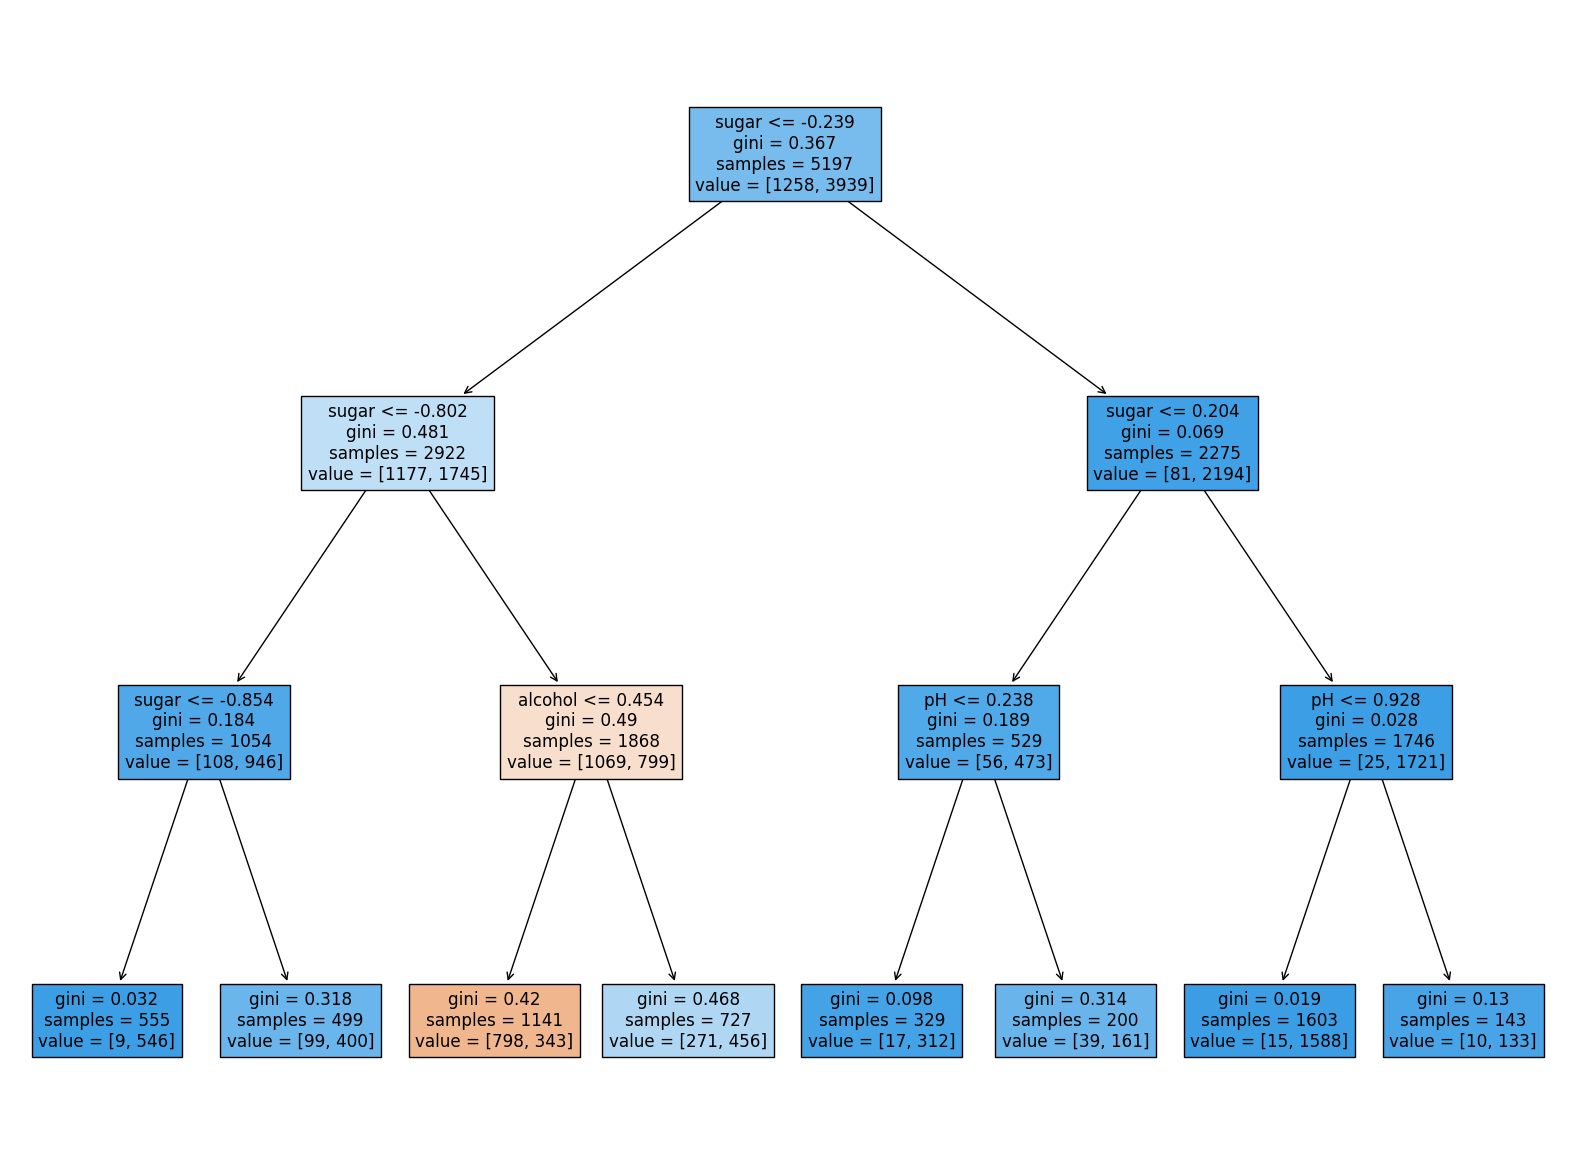

In [31]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [33]:
# alcohol, sugar, pH
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


In [34]:
# 데이터 전처리하기 전과 후의 결과가 같다.
dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


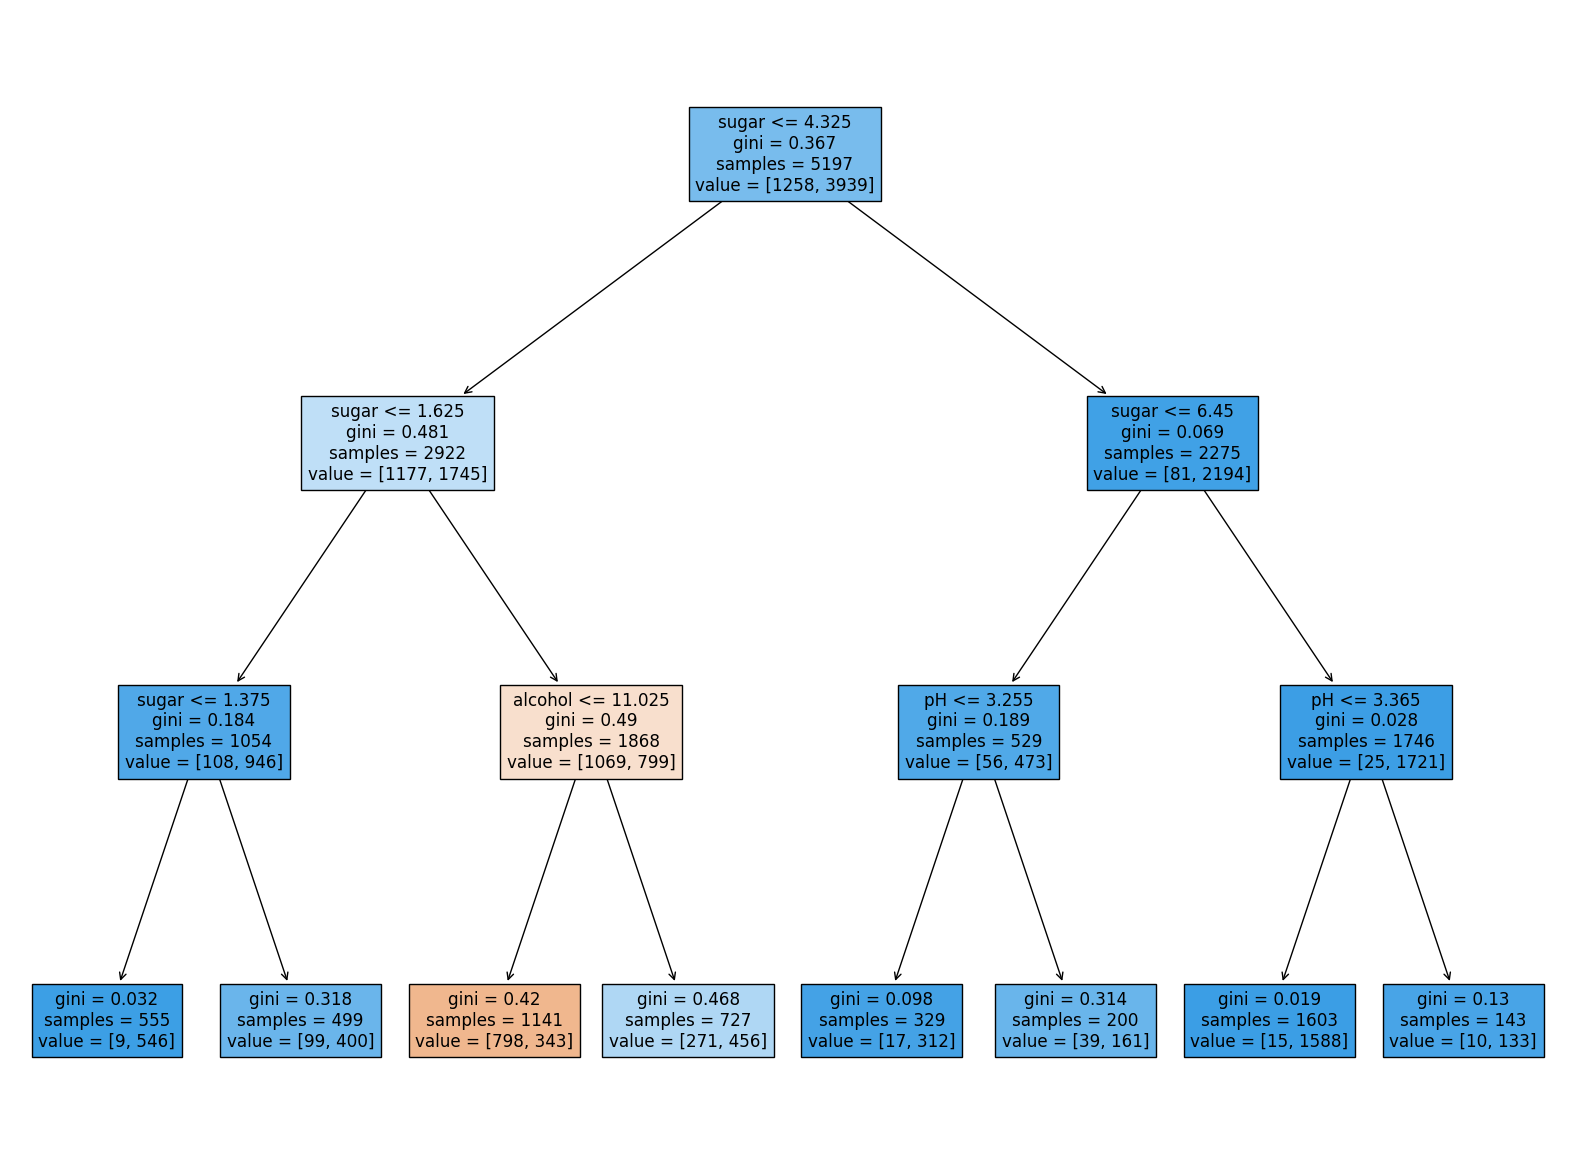

In [35]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

* 어떤 특성의 feature_importances_값이 낮다고 해서 유용하지 않다는 뜻은 아니다. 
* 단지 트리가 그 특성을 선택하지 않았을 뿐 다른 특성이 동일한 정보를 가지고 있어서 일 수도 있다. 

In [36]:
# alcohol, sugar, pH
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


### 지니 불순도
* 지니불순도 = $1 - (음성클래스 비율)^2 + (양성클래스비율)^2)$
* 부모의 불순도 -$\frac{왼쪽노드의 샘플수}{부모의 샘플수} * (왼쪽노드의 불순도) - \frac{오른쪽노드의 샘플수}{부모의 샘플수} * (오른쪽노드의 불순도)$ <br> = 0.367 - (2922/5197)*0.481 - (2275/5197) * 0.069 = 0.066

#### 결정 트리 모델
* 결정 트리에서 모델 복잡도를 조절하는 매개변수는 사전 가지치기 이다.(max_depth) <br><br>
* 장점
    1. 만들어진 모델을 쉽게 시각화 할 수 있다.
    2. 데이터의 스케일에 구애받지 않는다. 각 특성이 개별적으로 처리되어 데이터를 분할하는데 영향을 받지 않는다.
    3. 정규화나 표준화 같은 전처리 과정이 필요 없다.
    4. 규제 필요없다. <br><br>
* 단점
    1. 사전 가지치기를 사용한다고 해도 과대적합이 될 수 있다. -> 일반화하기 힘들다.
    2. 과대 적합의 문제의 대안으로 앙상블 방법을 사용한다.

# 확인문제

In [38]:
# p.241 min_mipurity_decrese=0.0005 : 매개변수보다 작으면 더이상 분할하지 않음
# 좌우가 균일하지 않은 트리가 만들어집니다.
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state = 42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


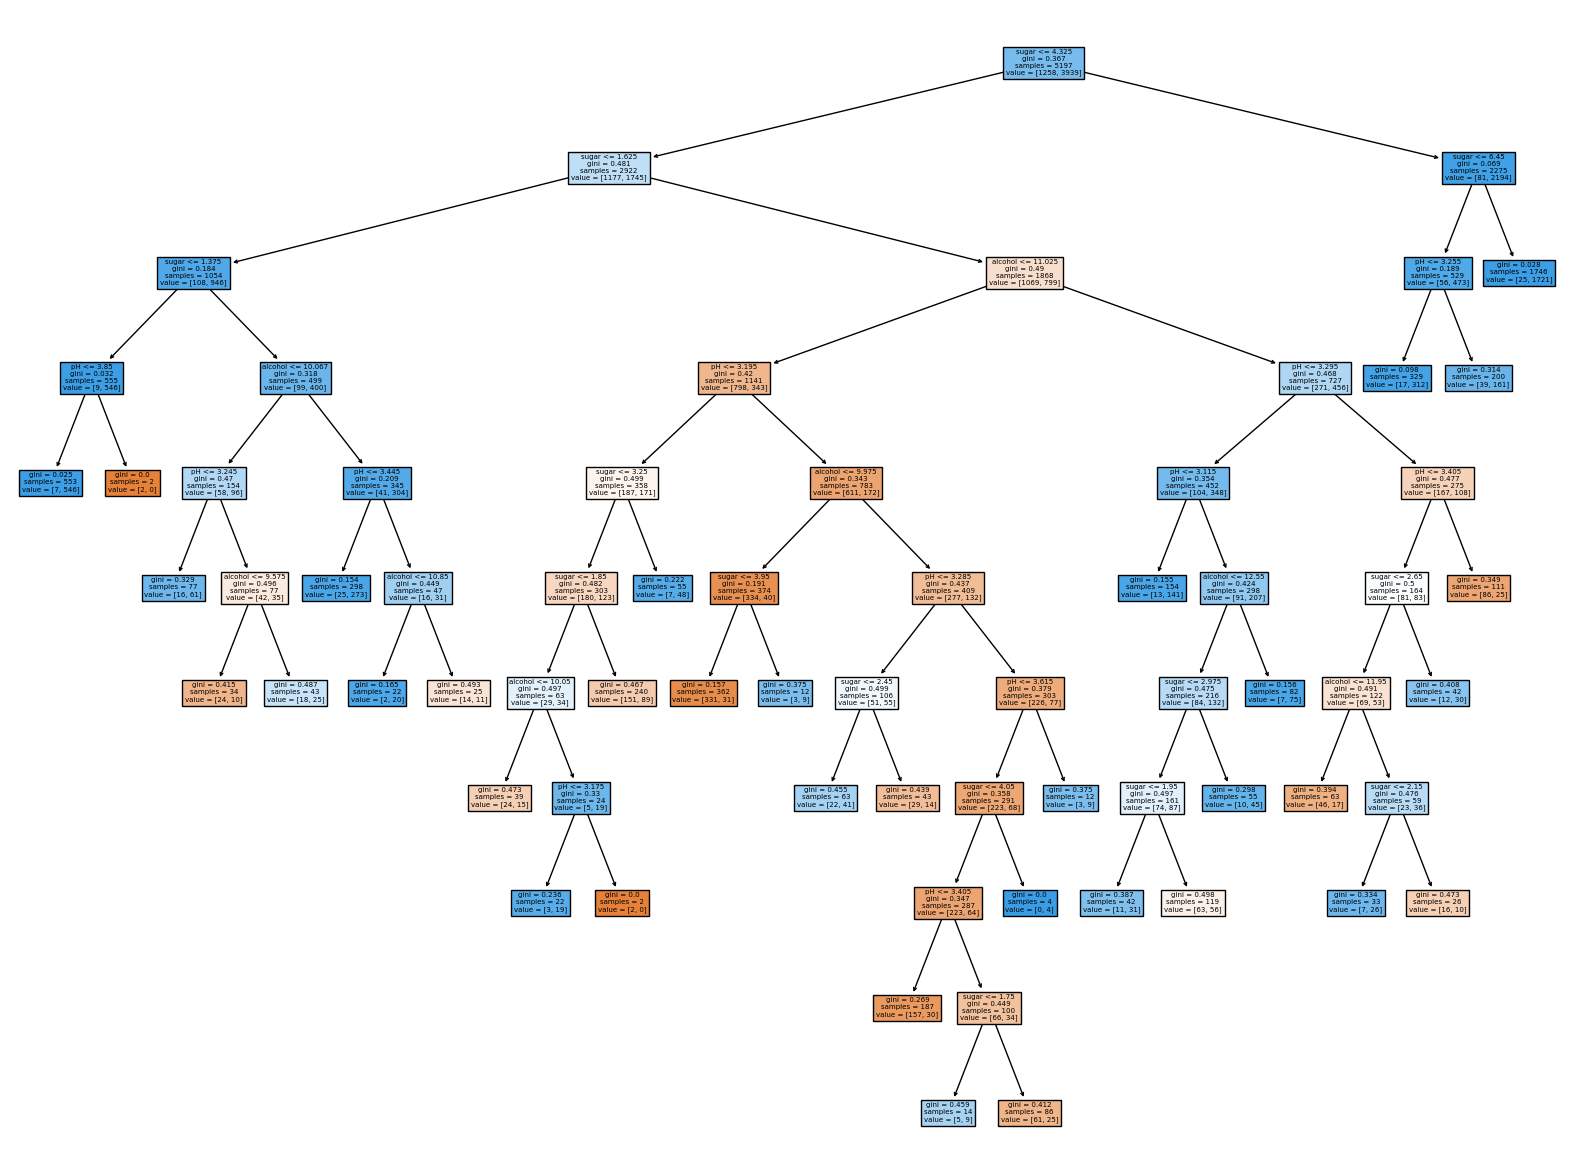

In [39]:
plt.figure(figsize = (20,15))
plot_tree(dt, filled=True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()